1-975.png


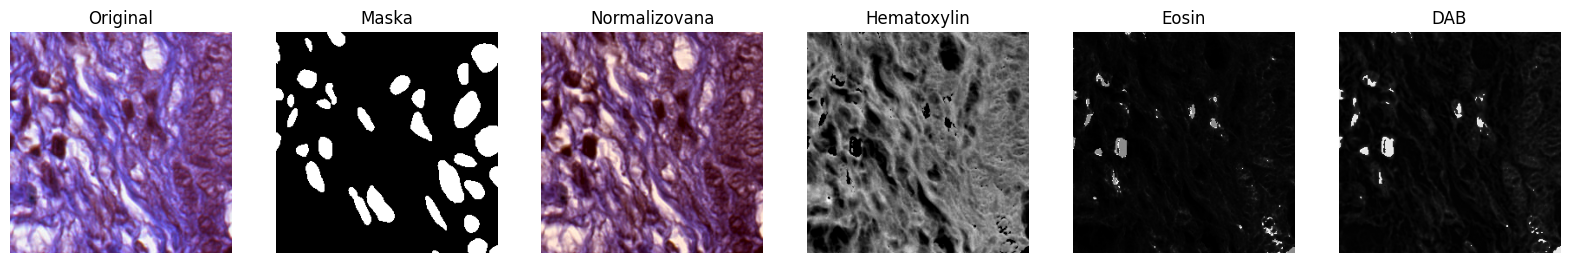

1-962.png


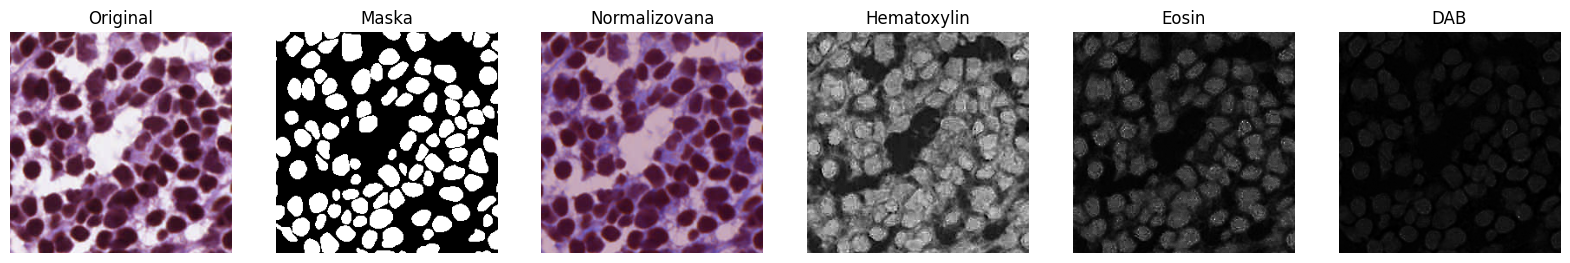

1-957.png


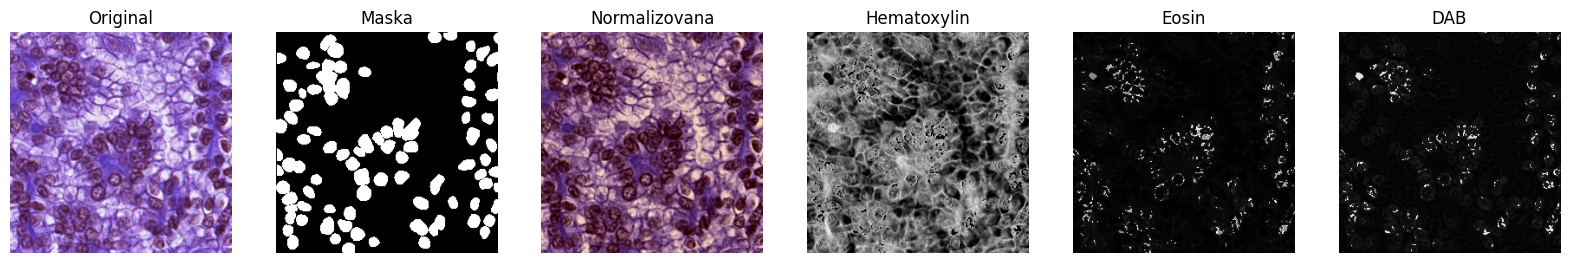

1-955.png


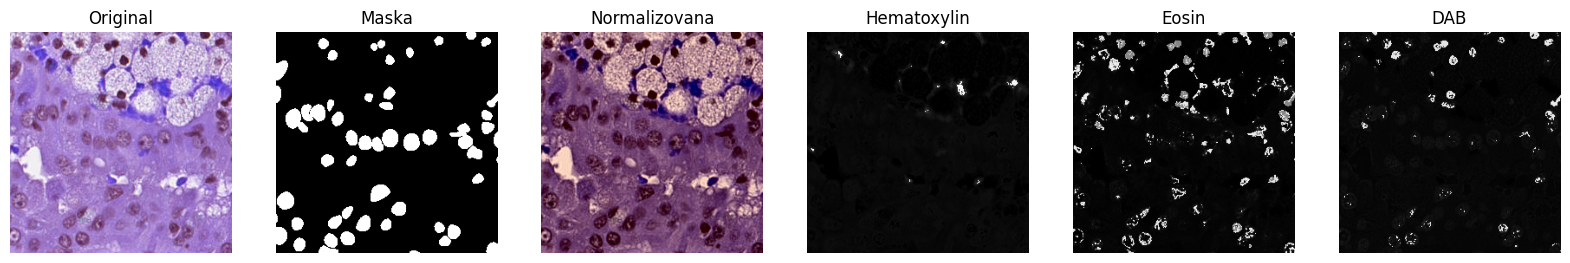

1-645.png


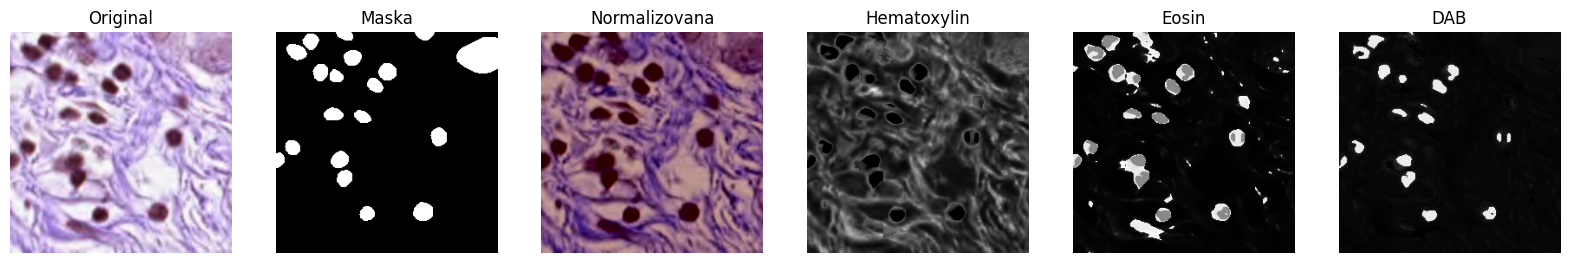

1-546.png


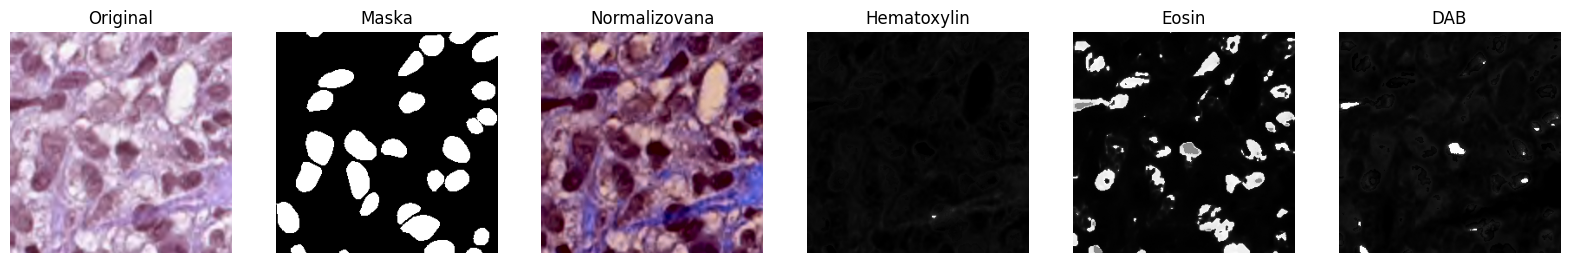

1-396.png


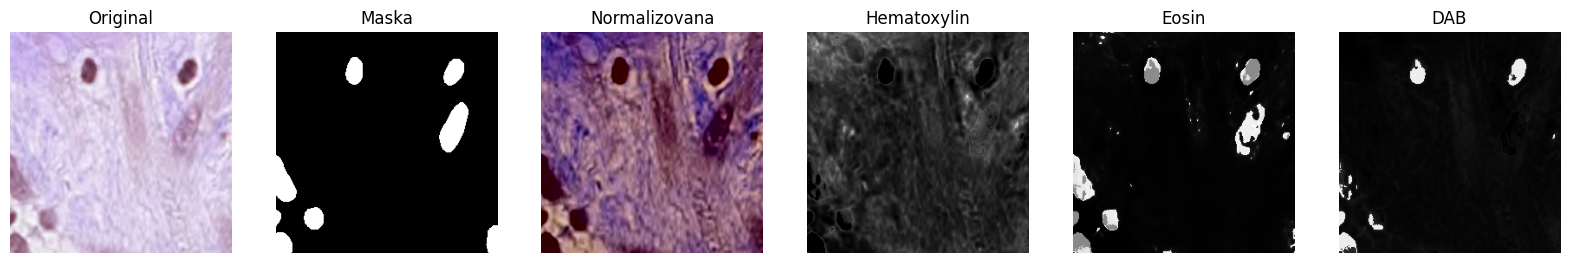

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from skimage.color import separate_stains, hed_from_rgb

image_dir = r"C:\Users\User\Desktop\abs\projekat\dataset\images"
mask_dir = r"C:\Users\User\Desktop\abs\projekat\dataset\masks"

# Template slika
template_name = "1-2440.png"
tamplate_path = os.path.join(image_dir, template_name)

def get_mean_and_std(x):
    x_mean, x_std = cv2.meanStdDev(x)
    x_mean = np.hstack(np.around(x_mean, 2))
    x_std = np.hstack(np.around(x_std, 2))
    return x_mean, x_std

# Template LAB statistike
template_img = cv2.imread(tamplate_path)
template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2LAB)
template_mean, template_std = get_mean_and_std(template_img)

# Lista slika koje želimo obraditi
input_img_list = [
    "1-975.png",
    "1-962.png",
    "1-957.png",
    "1-955.png",
    "1-645.png",
    "1-546.png",
    "1-396.png"
]

for img_name in input_img_list:
    print(f"{img_name}")
    input_path = os.path.join(image_dir, img_name)
    mask_path = os.path.join(mask_dir, img_name)

    input_img = cv2.imread(input_path)
    mask_img = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Reinhard normalizacija
    input_lab = cv2.cvtColor(input_img, cv2.COLOR_BGR2LAB)
    img_mean, img_std = get_mean_and_std(input_lab)

    height, width, channel = input_lab.shape
    for i in range(height):
        for j in range(width):
            for k in range(channel):
                x = input_lab[i, j, k]
                x = ((x - img_mean[k]) * (template_std[k] / img_std[k])) + template_mean[k]
                x = round(x)
                x = 0 if x < 0 else x
                x = 255 if x > 255 else x
                input_lab[i, j, k] = x

    normalized_img = cv2.cvtColor(input_lab, cv2.COLOR_LAB2BGR)

    # Stain separation
    rgb_norm = cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB)
    hed = separate_stains(rgb_norm, hed_from_rgb)
    hematoxylin = hed[:, :, 0]
    eosin = hed[:, :, 1]
    dab = hed[:, :, 2]

 

 
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))

    axes[0].imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original")
    axes[0].axis("off")

    axes[1].imshow(mask_img, cmap="gray")
    axes[1].set_title("Maska")
    axes[1].axis("off")

    axes[2].imshow(rgb_norm)
    axes[2].set_title("Normalizovana")
    axes[2].axis("off")

    axes[3].imshow(hematoxylin, cmap="gray")
    axes[3].set_title("Hematoxylin")
    axes[3].axis("off")

    axes[4].imshow(eosin, cmap="gray")
    axes[4].set_title("Eosin")
    axes[4].axis("off")

    axes[5].imshow(dab, cmap="gray")
    axes[5].set_title("DAB")
    axes[5].axis("off")

    plt.show()


Reinhard bolje radi kad se koristi cela slika slajda ili veci patchza template, jer tada proseci i standardne devijacije boja bolje reprezentuju datase
- amozdaaaaa  racunati prosecne LAB vrednosti preko vise slicnih patch-eva, pa to koristiti kao globalni template

In [76]:
image_dir = r"C:\Users\User\Desktop\abs\projekat\dataset\images"
image_files = sorted(os.listdir(image_dir))

def get_mean_and_std_lab(img_bgr):
    """Računa srednje i std vrednosti u LAB prostoru."""
    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
    mean, std = cv2.meanStdDev(lab)
    mean = mean.flatten()
    std = std.flatten()
    return mean, std

# stat za sve slike
all_means = []
all_stds = []
for fname in image_files:
    path = os.path.join(image_dir, fname)
    img = cv2.imread(path)
    if img is None:
        continue
    mean, std = get_mean_and_std_lab(img)
    all_means.append(mean)
    all_stds.append(std)

all_means = np.array(all_means)
all_stds = np.array(all_stds)

# Globalni prosek dataset-a
global_mean = np.mean(all_means, axis=0)
global_std = np.mean(all_stds, axis=0)

# Tslika cija je stat najbliza proseku
best_idx = None
best_dist = float("inf")

for i, (mean, std) in enumerate(zip(all_means, all_stds)):
    dist = np.linalg.norm(mean - global_mean) + np.linalg.norm(std - global_std)
    if dist < best_dist:
        best_dist = dist
        best_idx = i

best_image_name = image_files[best_idx]
print("slika za template je:", best_image_name)


slika za template je: 1-1028.png


da normalizujem ceo folder i sacuvam ga u drugi - tuga 

In [ ]:
# # Ulazni i izlazni folderi
# image_dir = r"C:\Users\User\Desktop\abs\projekat\dataset\images"
# output_dir = r"C:\Users\User\Desktop\abs\projekat\dataset\normalized_images"
# os.makedirs(output_dir, exist_ok=True)

# # Template fajl
# template_name = "1-1028.png"
# template_path = os.path.join(image_dir, template_name)

# def get_mean_and_std(x):
#     """Računa srednje i std vrednosti po kanalima."""
#     x_mean, x_std = cv2.meanStdDev(x)
#     x_mean = np.hstack(np.around(x_mean, 2))
#     x_std = np.hstack(np.around(x_std, 2))
#     return x_mean, x_std

# # Učitavanje template slike i statistike
# template_img = cv2.imread(template_path)
# template_lab = cv2.cvtColor(template_img, cv2.COLOR_BGR2LAB)
# template_mean, template_std = get_mean_and_std(template_lab)

# # Lista svih slika
# image_files = sorted(os.listdir(image_dir))

# # Reinhard normalizacija svih slika
# for img_name in image_files:
#     input_path = os.path.join(image_dir, img_name)
#     output_path = os.path.join(output_dir, img_name)

#     img = cv2.imread(input_path)
#     if img is None:
#         print(f" Preskačem {img_name}, nije validna slika.")
#         continue

#     # LAB konverzija
#     img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#     img_mean, img_std = get_mean_and_std(img_lab)

#     # Reinhard transformacija
#     height, width, channel = img_lab.shape
#     norm_lab = np.zeros_like(img_lab)
#     for i in range(channel):
#         norm_lab[:, :, i] = ((img_lab[:, :, i] - img_mean[i]) *
#                              (template_std[i] / (img_std[i] + 1e-8)) +
#                              template_mean[i])
#         norm_lab[:, :, i] = np.clip(norm_lab[:, :, i], 0, 255)

#     # Povratak u BGR
#     norm_bgr = cv2.cvtColor(norm_lab.astype(np.uint8), cv2.COLOR_LAB2BGR)

#     # Čuvanje u izlazni folder
#     cv2.imwrite(output_path, norm_bgr)
#     print(f" Sačuvana normalizovana slika: {output_path}")

# print("\n Normalizacija završena! Sve slike su u folderu:", output_dir)
